# Clustering

* Clustering is an unsupervised technique. The underlying assumption is that,the observed data is coming from multiple populations. To elaborate the marketing strategy example, it is assumed that distinct populations exist among the cust Objective of clustering is to form homogeneous partitions out of heterogeneous observations.
* Clustering may be done in many ways, not all of them are optimally data driven. It is possible to define clusters based on age-groups alone, or based on total amount spentor visit frequency. In subsequent sections we will discuss data driven clustering procedures only. The rationale behind such procedures is to define homogenous partition of the data.
* Customer base for a supermarket. The difference among populations may not be based on demographics only. A set of complex characteristics based on demography, socio-economic strataand other conditions delineate the populations and they form a partition of the customers. Once the clusters are identified, they can be studied in a better manner and possibly different strategies are applied to garner more business from the targetedgroups.

### Clustering is an unsupervised learning technique to partition the data into homogeneous segments. Within a cluster the observations may be assumed to come from one single population. Observations belonging to different clusters are assumed to represent different populations.


<centre><img src="Picture1.PNG">

## Assumption in Clustering

I.  It is assumed that the observations are not generated from a single population. However, there is no concrete evidence that it is so.
<br>II. The rationale behind clustering is that, when the data set is partitioned into multiple groups, the sum of variations within each group (within sum of square) is substantially smaller than the total variation in the data.
<br>III. Since the number of populations present, k, is unknown, it is also determined from the data.
<br>IV. Once the different populations are identified, they must bet related separately. This implies that the set of defining parameters must not be identical. If any predictive model is developed, a separate model needs to be developed for each population.


##   Methods of Clustering

There  are  two  primary  approaches  to  clustering;  namely  **hierarchical  or  agglomerative clustering and k-means clustering**. In hierarchical clustering, the closest points are combined in a pairwise manner to form the clusters. It is an iterative procedure, where at every step of the iteration, two points or two clusters are combined to form a bigger cluster. At the end of t`he process  all  points  are  combined  into  a  single  cluster.  The  number  of  clusters  is  not  pre-determined

### Hierarchical  clustering
(also called hierarchical  cluster  analysisor HCA)  is a method of cluster  analysis  which  seeks  to build a  hierarchy  of  clusters.  Strategies  for  hierarchical clustering generally fall into twotypes:
1. Agglomerative:This is a"bottom-up"approach:each observation starts in its own cluster, and pairs of clusters are merged as one moves up thehierarchy.
3. Divisive:This is a"top-down"approach:all observations start in one cluster,and splits are performed recursively as one moves down the hierarchy

## K-Means Clustering

k-means clustering is the most used non-hierarchical clustering technique. It aims to partition n observations into k clusters in which each observation belongs to the cluster whose mean (centroid) is nearest to it, serving as a prototype of the cluster. It minimizes within-cluster variances (squared Euclidean distances).
The most common algorithm uses an iterative refinement technique. Due to its ubiquity, it is often called "the k-means algorithm".

k-means clustering is the most used non-hierarchical clustering technique. It aims to partition n observations into k clusters in which each observation belongs to the cluster whose mean (centroid) is nearest to it, serving as a prototype of the cluster. It minimizes within-cluster variances (squared Euclidean distances).
The most common algorithm uses an iterative refinement technique. Due to its ubiquity, it is often called "the k-means algorithm".

Steps
1. Step 1. Select the first item from the list. This item forms the centroid of the first cluster.
2. Step 2. Search through the subsequent items until an item is found that is at least distance δ away from any previously defined cluster centroid. This item will form the centroid of the next cluster.
3. Step 3: Step 2 is repeated until all k cluster centroids are obtained or no further items can be assigned.
4. Step 4: The initial clusters are obtained by assigning items to the nearest cluster centroids.

Objective of partitioning is to separate out the observations or units so that the ‘most’ similar items are put together. Recall that singleton clusters will have the lowest value of WSS, but that is not useful. Hence finding k is striking a balance between WSS and cluster size.

In [1]:
# Adding Preliminary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Importing Dataset

from sklearn import datasets
iris = datasets.load_iris()
iris_data = pd.read_csv('iris.csv')
#iris_data = pd.DataFrame(iris)
#iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Type
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [39]:
#Preparing Data
'''Here we have the target variable ‘Type’. We need to remove the target variable so that this dataset can be used to work
in an unsupervised learning environment. The iloc function is used to get the features we require.
We also use '.values' function to get an array of the dataset.
(Note that we transformed the dataset to an array so that we can plot the graphs of the clusters).'''

iris_X = iris_data.iloc[:, [ 1, 2,3]].values

In [40]:
'''Now we will separate the target variable from the original dataset and again convert it to an array by using numpy.'''

iris_Y = iris_data['Type']
iris_Y = np.array(iris_Y)

### Clustering plot

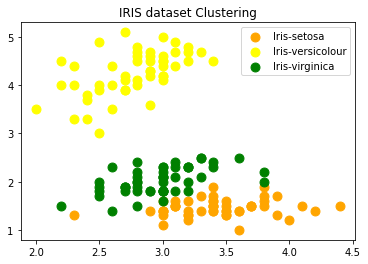

In [41]:
# Visualise Classes
'''In this IRIS dataset, we have three classes. We visualise these classes in a 2-D graph.'''

plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 2], s = 80, c = 'green', label = 'Iris-virginica')
plt.title('IRIS dataset Clustering')
plt.legend()

In [42]:
'''Kmeans is a kind of Unsupervised type of Clustering . It basically takes input from Dataset and predicts the clusters 
accordingly'''

#Import Libraries for Kmeans

from sklearn.cluster import KMeans

In [43]:

'''Implicit objective function in k-Means measures sum of distances of observations from their cluster centroids,
called Within-Cluster-Sum-of-Squares (WCSS)'''
# Assigning the WCSS
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_X)
    wcss.append(kmeans.inertia_)

### Elbow method

Text(0, 0.5, 'WCSS')

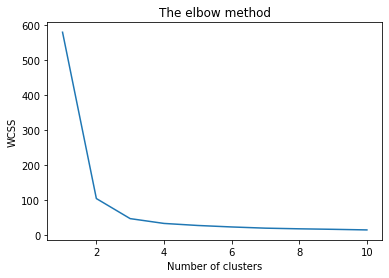

In [44]:
'''Elbow-Method using WCSS: This is based on principle that while clustering performance as measured by WCSS increases (i.e. WCSS decreases) 
with increase in k, rate of increase is usually decreasing. So performance improvement for increasing number of cluster 
from, say, 3 to 4 is higher than that for increasing from 4 to 5. '''
# Plot the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [45]:

# Modelling K-Means

cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(iris_X)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Kmeans Clustering plot for IRIS dataset

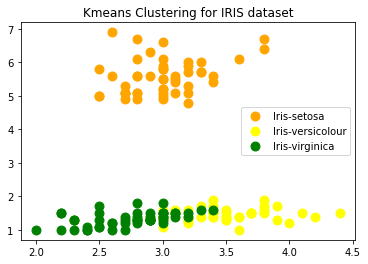

In [46]:
# Plotting the Kmeans Clustering

plt.scatter(iris_X[pred_kmeans == 0, 0], iris_X[pred_kmeans == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[pred_kmeans == 1, 0], iris_X[pred_kmeans == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[pred_kmeans == 2, 0], iris_X[pred_kmeans == 2, 2], s = 80, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
#plt.scatter(cluster_Kmeans.cluster_centers_[:, 0], cluster_Kmeans.cluster_centers_[:,1], s = 80, c = 'red', label = 'Centroids')
plt.title('Kmeans Clustering for IRIS dataset')
plt.legend()

### Kmeans Accuracy using KNN classifier for IRIS dataset

In [47]:
'''KNN classifier which is a type of supervised Machine Learning Technique. 
This is used to detect the accuracy and classification  of the given dataset'''

# Importing Libraries for Modelling.
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:

# Assigning values of X and y from dataset

X, y = iris.data[:, :], iris.target  
''' Here X is assigned as all the column data(SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) and
y is assigned as Species value(Iris-setosa, Iris-versicolour, Iris-virginica)  ))'''

#Setting training and testing values

Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Modeling is done using KNN classifiers.
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)


# Display the Output

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Accuracy Score: 0.9736842105263158
Confusion matrix 
 [[11  0  0]
 [ 0 10  0]
 [ 0  1 16]]
Classification 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### Cohen kappa of Kmeans for IRIS dataset

In [49]:

from sklearn.metrics import cohen_kappa_score

cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9596174282678002

In [50]:
X, y = iris.data[:, :], iris.target

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [51]:
# Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.9166666666666666
[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]


In [52]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8733108108108109

In [53]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("K Nearest Neighbors :")
print("Accuracy = ", accuracy)
print(cm)

K Nearest Neighbors :
Accuracy =  0.95
[[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]


In [54]:

from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.924114671163575

In [55]:
#Support Vector Machine
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

Support Vector Machine:
Accuracy =  0.9333333333333333
[[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]


In [56]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8987341772151899

In [57]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = GaussianNB()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Gaussian Naive Bayes :")
print("Accuracy = ", accuracy)
print(cm)

Gaussian Naive Bayes :
Accuracy =  0.9666666666666667
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [58]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9470899470899471

In [59]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Decision Tree Classifier :
Accuracy =  0.9666666666666667
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]


In [60]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9392220421393841

In [61]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Random Forest Classifier :
Accuracy =  0.9666666666666667
[[16  0  0]
 [ 0 23  0]
 [ 0  3 18]]


In [62]:

from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9239864864864865

### Hierarchical clustering Analysis (HCA)

In [63]:
# For Hierarchical clustering

''' Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. It is aka Hierarchicla 
CLustering Analysis(HCA)'''

# Importing the Libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# loading Iris data
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:

import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distance in the space with other variables')

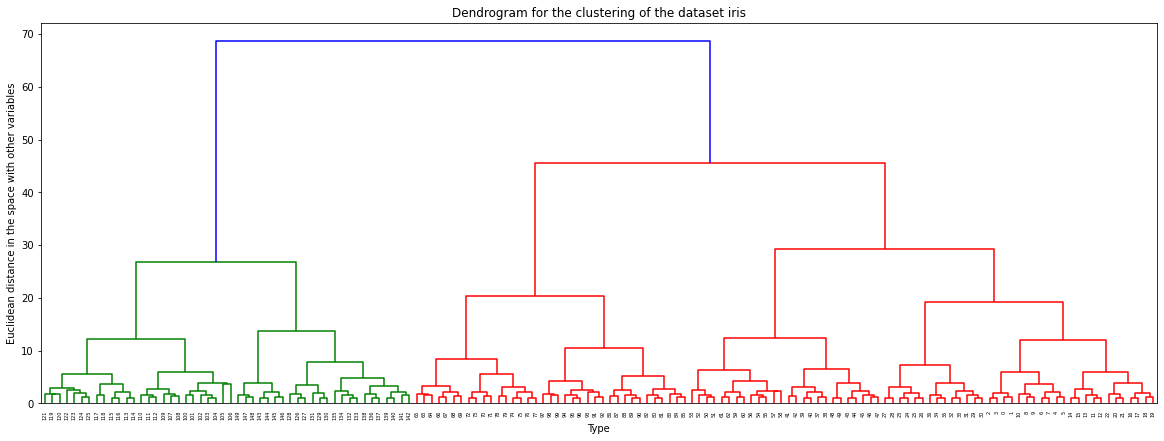

In [34]:
# Visualization of cluster hierarchy

'''To visualize the tree representing the hierarchical merging of clusters as a dendrogram'''

Z = sch.linkage(iris_X, method = 'median')
plt.figure(figsize=(20,7))

# Plotting the Dendogram

den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset iris')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

In [65]:
# Loading the HCA formula for clustering
cluster_H = AgglomerativeClustering(n_clusters=3)

In [66]:
# Modelling the data
model_clt = cluster_H.fit(iris_X)
model_clt
pred1 = model_clt.labels_
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0], dtype=int64)

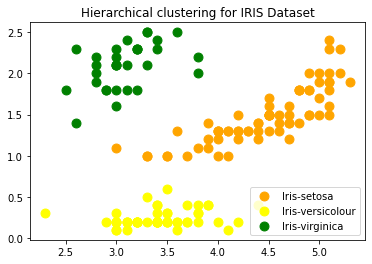

In [67]:

# Plotting the HCA Cluster

plt.scatter(iris_X[pred1 == 0, 1], iris_X[pred1 == 0, 2], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[pred1 == 1, 0], iris_X[pred1 == 1, 2], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[pred1 == 2, 0], iris_X[pred1 == 2, 2], s = 80, c = 'green', label = 'Iris-virginica')
plt.title('Hierarchical clustering for IRIS Dataset')
plt.legend()

In [68]:
import sklearn.metrics as sm

target = pd.DataFrame(iris.target)
#based on the dendrogram we have two clusetes 
k =3 
#build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="ward")
#fit the model on the dataset
HClustering.fit(iris_X)
#accuracy of the model
sm.accuracy_score(target,HClustering.labels_)

0.20666666666666667